# Importando as dependências

In [1]:
# coding: UTF-8
from ipywidgets import interact_manual
import matplotlib.pyplot as plt
import cv2
import copy
import numpy as np

# Carregando a Imagem

In [2]:
# Carregando a imagem
image = cv2.imread("../data/testepiscina.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

[ WARN:0@38.679] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../data/testepiscina.png'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


# 1 - Filtro Média Móvel

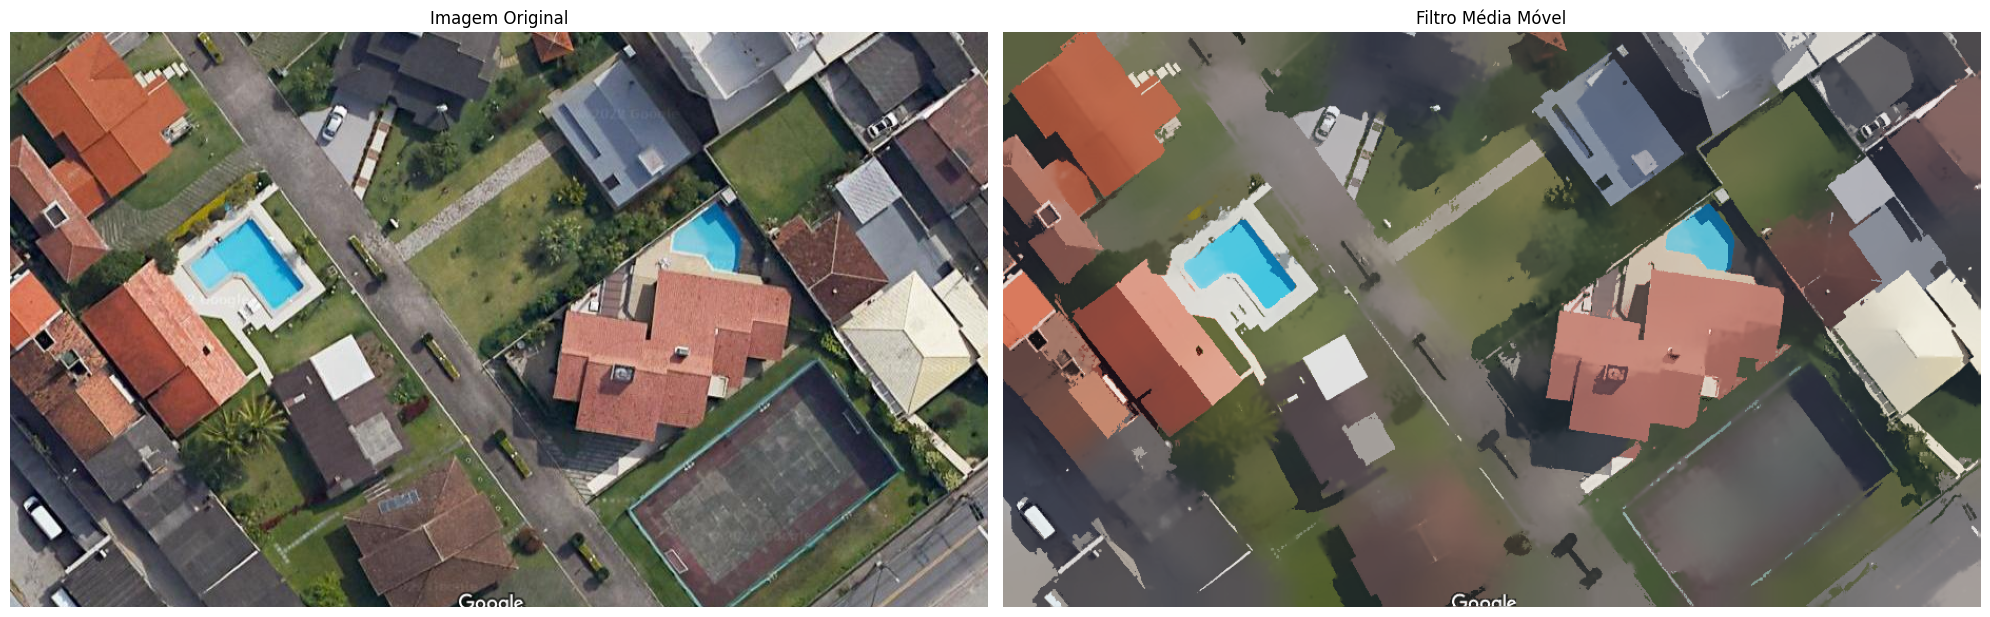

In [106]:
# Filtro
shifted = cv2.pyrMeanShiftFiltering(image, sp=21, sr=51)

# Mostra as imagens
fig, axes = plt.subplots(nrows = 1,ncols=2, figsize=(20, 7), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title('Imagem Original')

ax[1].imshow(shifted)
ax[1].set_title('Filtro Média Móvel')

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

# 2 - Limiarização

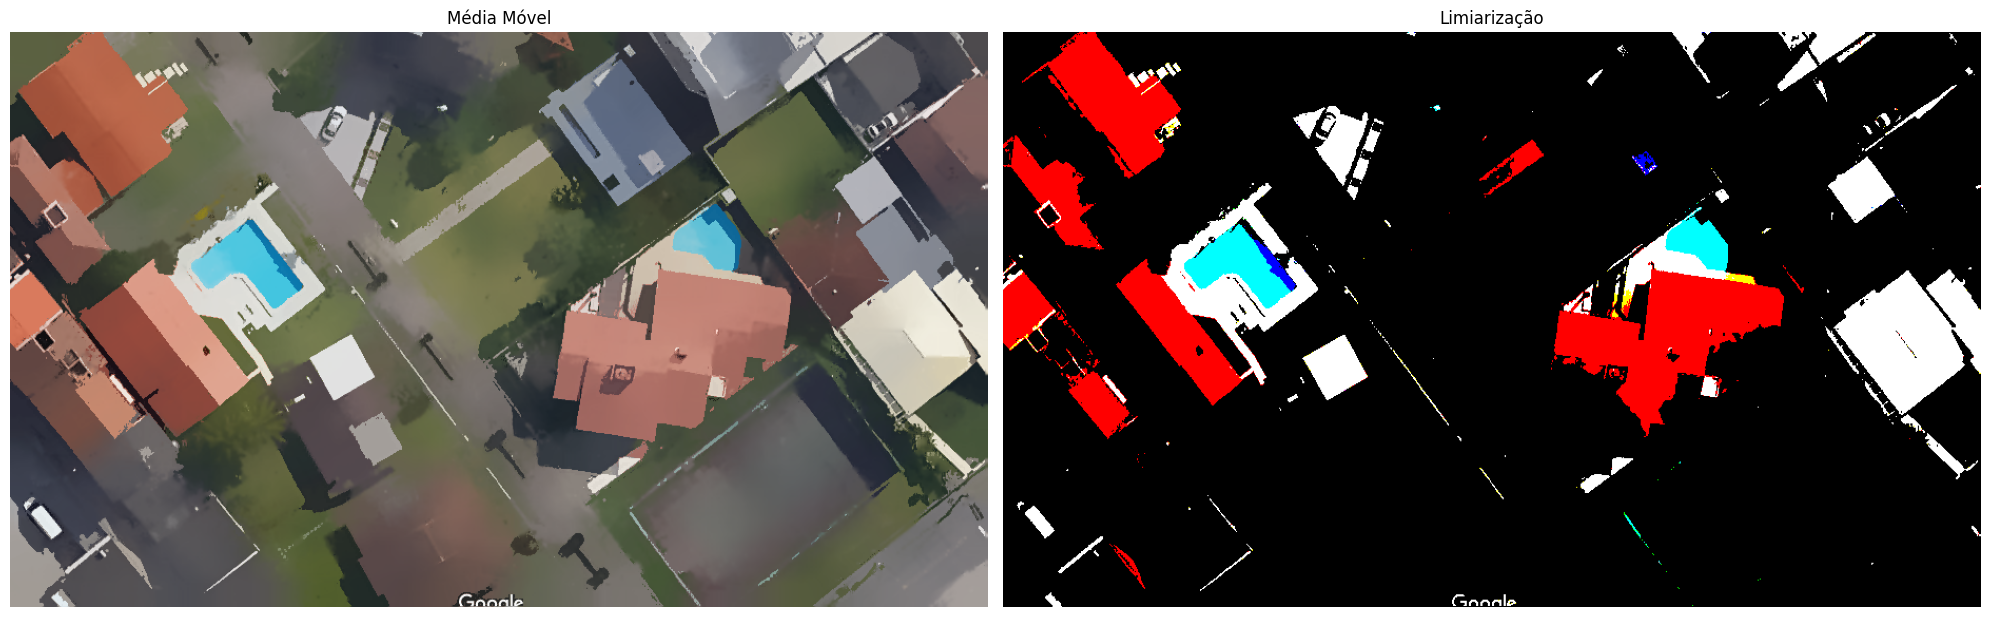

In [137]:
# Limiarização
ret, thresh = cv2.threshold(shifted,170,255,cv2.THRESH_BINARY)

# Mostra as imagens
fig, axes = plt.subplots(nrows = 1,ncols=2, figsize=(20, 7), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(shifted)
ax[0].set_title('Média Móvel')

ax[1].imshow(thresh)
ax[1].set_title('Limiarização')

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

# 3 - Máscara de Cor

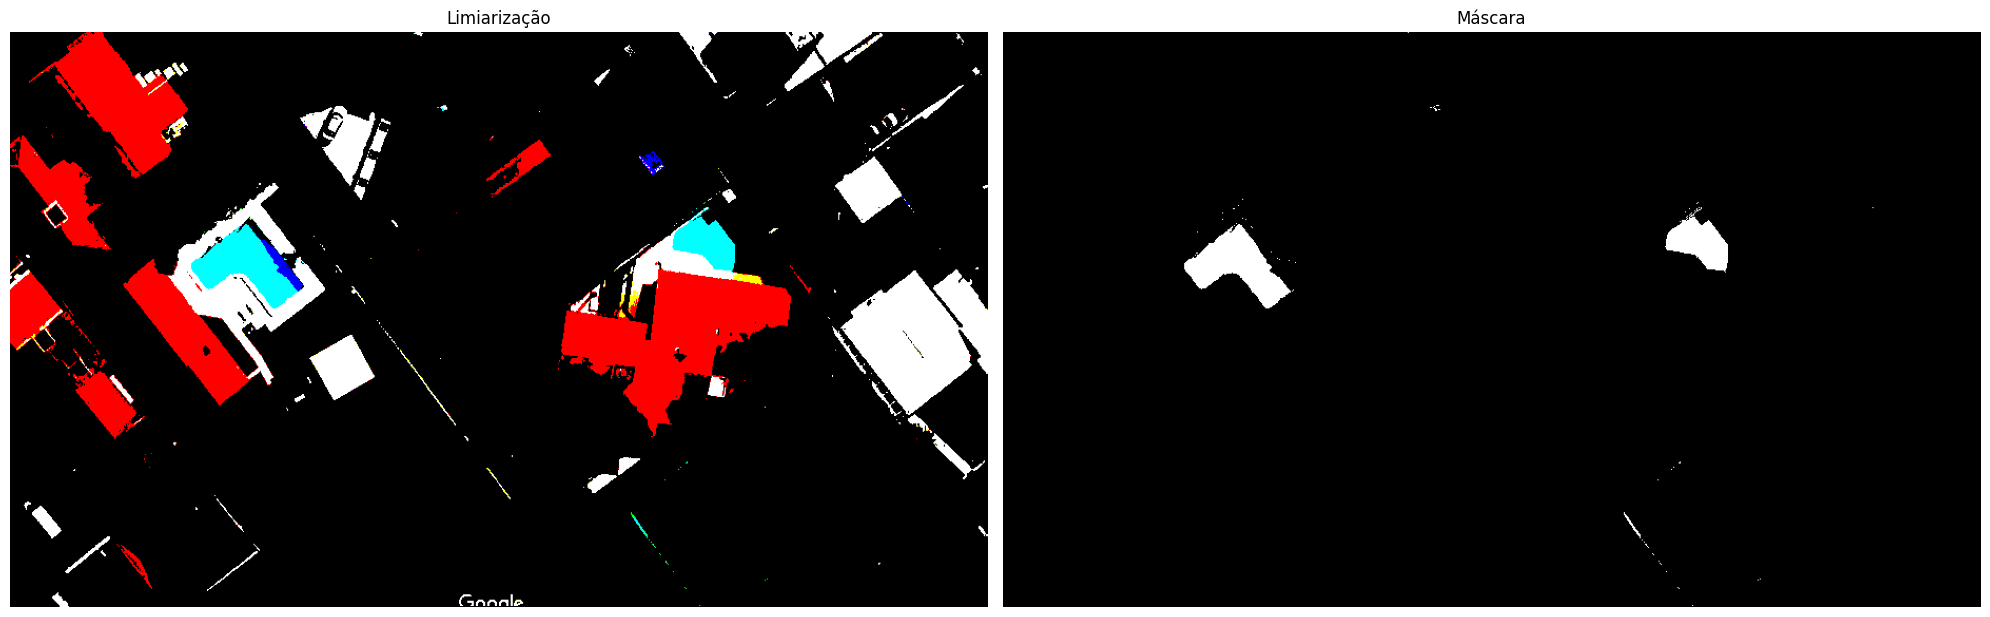

In [177]:
# Filtros de tons de azul
azulBaixo = np.array([10, 52, 72])
azulAlto = np.array([70, 255, 255])

# Converte o modo de cor
imgHSV = cv2.cvtColor(thresh, cv2.COLOR_BGR2HSV)

# Cria a Máscara
mascara = cv2.inRange(imgHSV, azulBaixo, azulAlto)
# Redimensiona o tamanho da máscara
mascara = cv2.resize(mascara, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
# Converte o modo de cor da máscara
mascara = cv2.cvtColor(mascara, cv2.COLOR_BGR2RGB)

# Mostra as imagens
fig, axes = plt.subplots(nrows = 1,ncols=2, figsize=(20, 7), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(thresh)
ax[0].set_title('Limiarização')

ax[1].imshow(mascara)
ax[1].set_title('Máscara')

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

# 4 - Refinamento

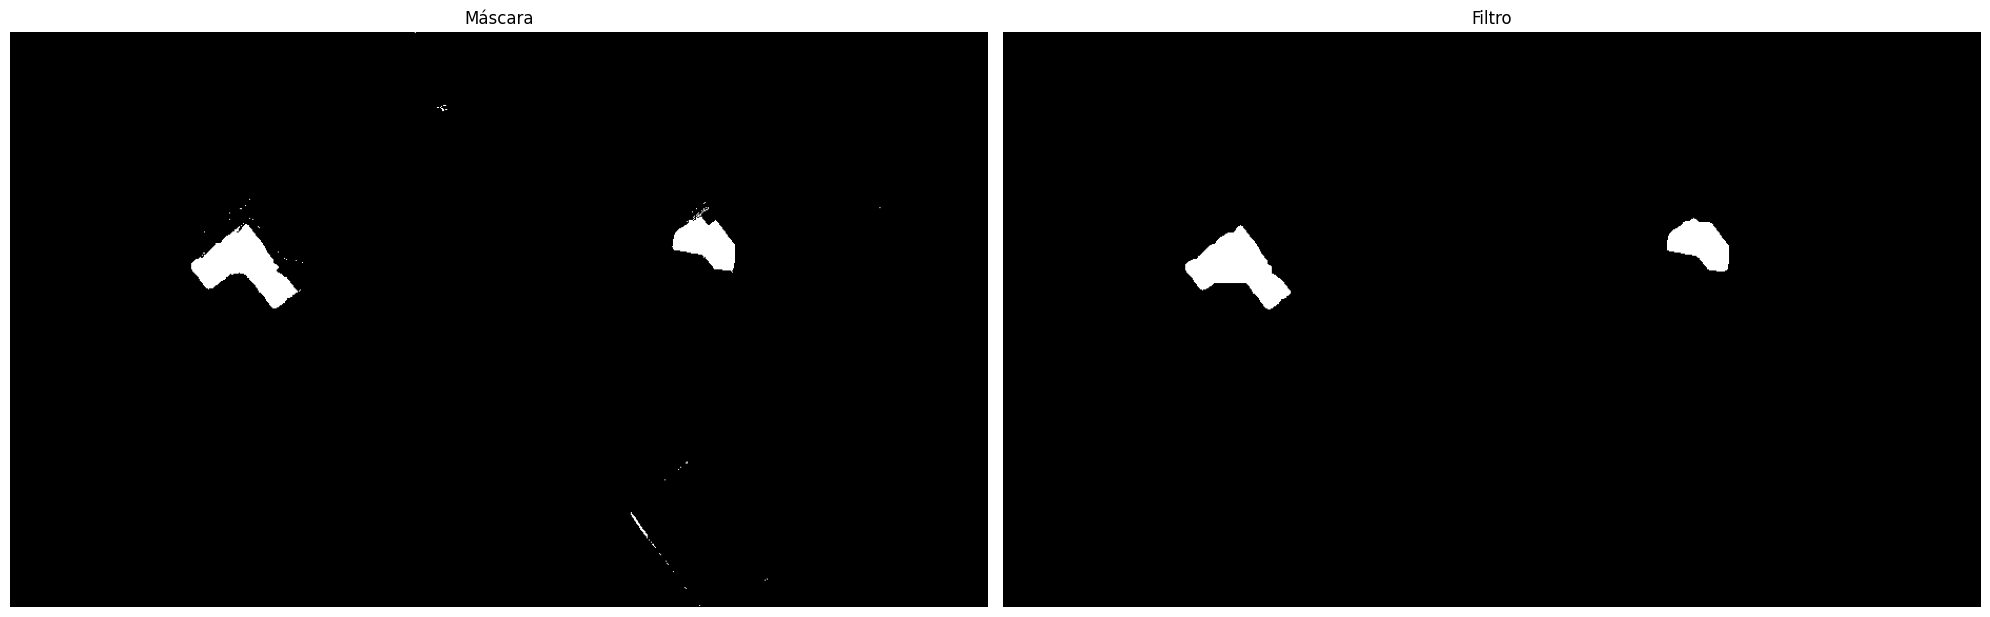

In [178]:
# Kernel de 5x5
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
opening = cv2.morphologyEx(mascara, cv2.MORPH_OPEN, kernel)
kernel2 = np.ones((30,30),np.uint8)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel2)

# Mostra as imagens
fig, axes = plt.subplots(nrows = 1,ncols=2, figsize=(20, 7), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(mascara)
ax[0].set_title('Máscara')

ax[1].imshow(closing)
ax[1].set_title('Filtro')

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

# Resultado Final

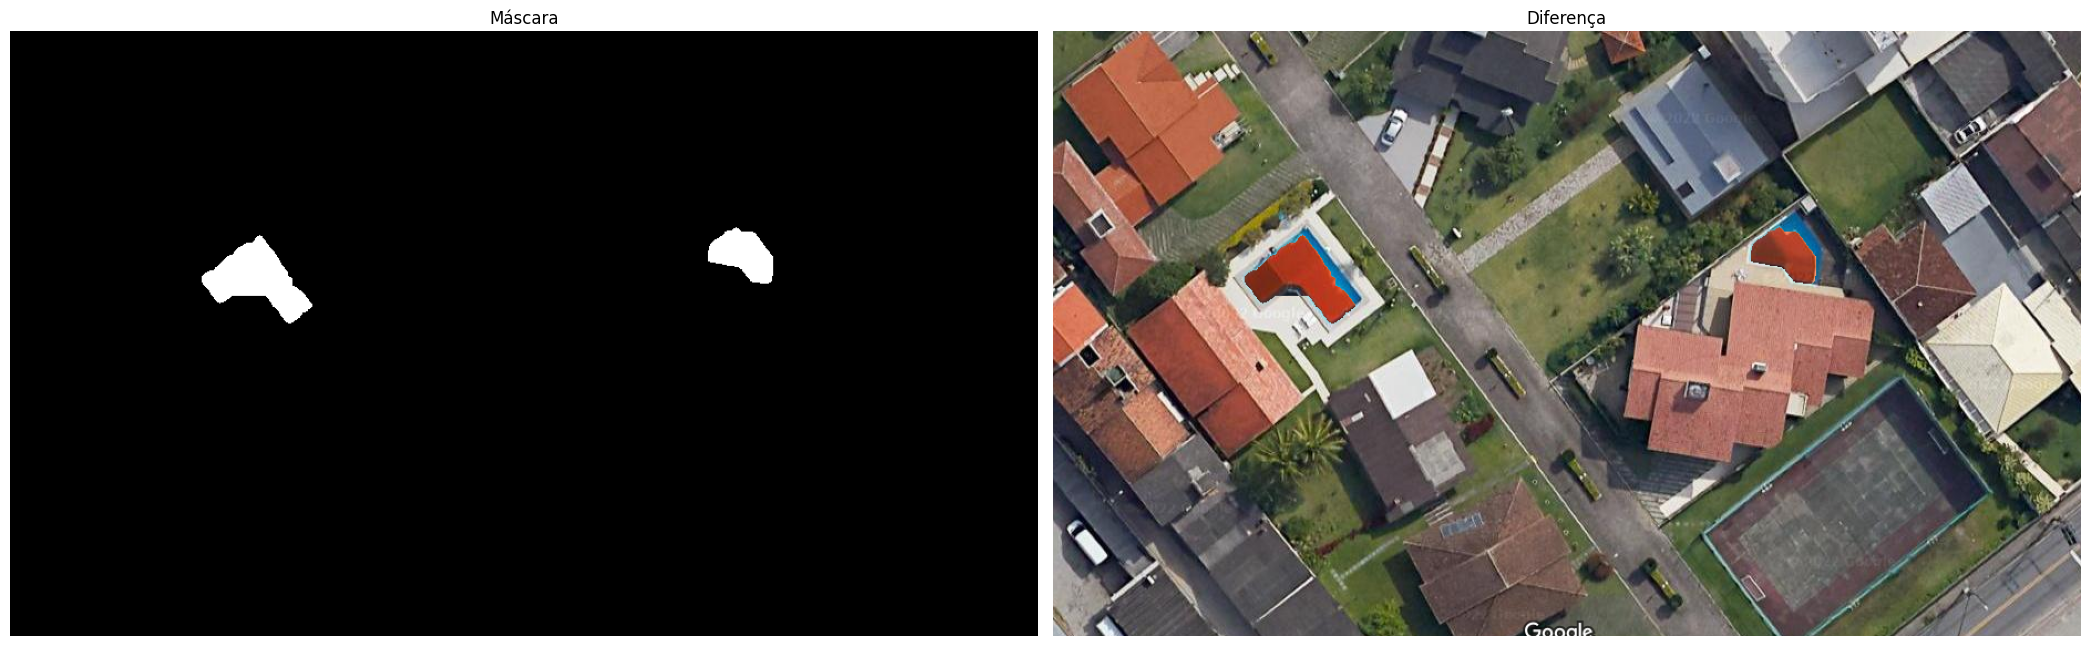

In [179]:
# Subtrai as imagens
diferenca = cv2.absdiff(image, closing)

# Mostra as imagens
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(21, 20), sharex=True, sharey=True)
ax = axes.ravel()

#ax[0].imshow(closing)
#ax[0].set_title('Máscara')
ax[0].imshow(image)
ax[0].set_title('Original')

#ax[1].imshow(diferenca)
#ax[1].set_title('Diferença')
ax[0].imshow(closing)
ax[0].set_title('Resultado obtido')


for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()